In [22]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
import scipy

In [2]:
df = pd.read_csv("../../data/train.csv")

In [3]:
y = df['SalePrice']
X = df.drop(columns=['SalePrice']).copy()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=9527)

In [5]:
X_train.shape, y_train.shape

((1168, 80), (1168,))

<AxesSubplot:>

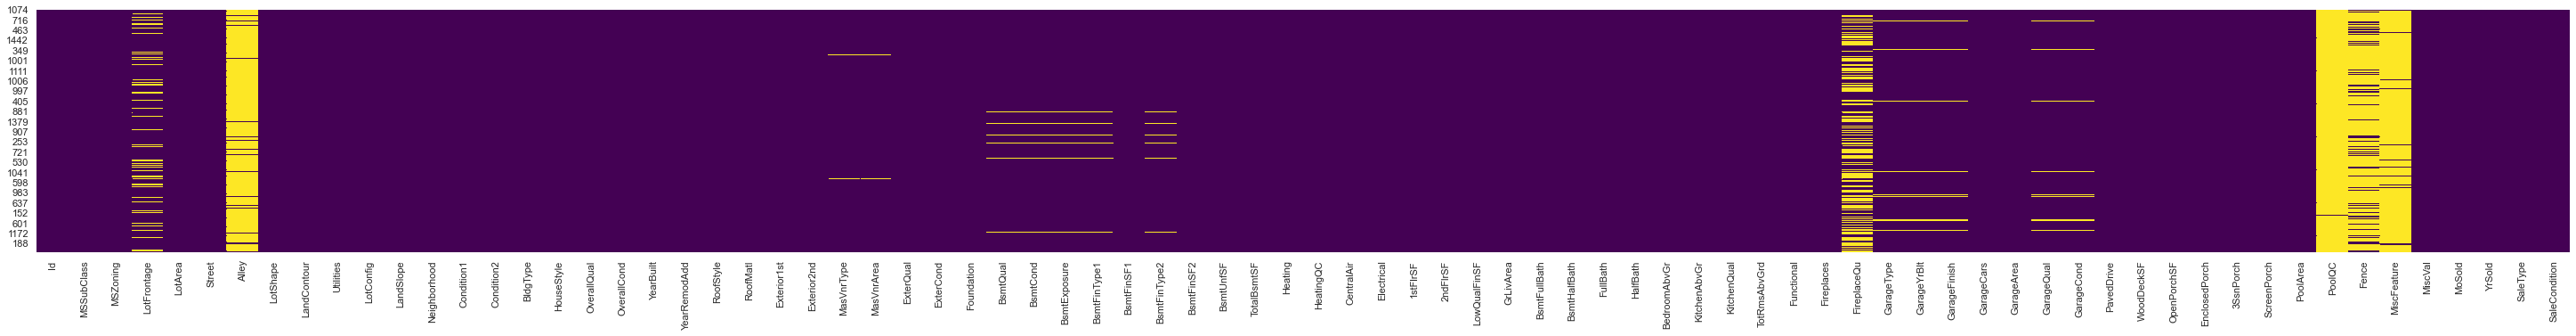

In [6]:
# visualize missing rates in X_train
sns.set(rc={'figure.figsize':(51,5)})
sns.heatmap(X_train.isnull(), cmap='viridis', cbar=False)

In [7]:
# print out missing rates by feature
(X_train.isnull().sum()/X_train.shape[0]).sort_values(ascending=False)[:20]

PoolQC          0.994863
MiscFeature     0.959760
Alley           0.940068
Fence           0.807363
FireplaceQu     0.464897
LotFrontage     0.184075
GarageCond      0.052226
GarageType      0.052226
GarageYrBlt     0.052226
GarageFinish    0.052226
GarageQual      0.052226
BsmtExposure    0.027397
BsmtCond        0.026541
BsmtQual        0.026541
BsmtFinType1    0.026541
BsmtFinType2    0.026541
MasVnrArea      0.005137
MasVnrType      0.005137
Electrical      0.000856
LotConfig       0.000000
dtype: float64

In [8]:
X_train.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

### Checking out the data_description: some categoric vars have orderal meanings (better to encode with `Label Encoding`, eg,BsmtFinType2, BsmtQual etc.). Some integer might be categoric vars (eg MSSubClass). Need to be cautious when preprocessing.

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

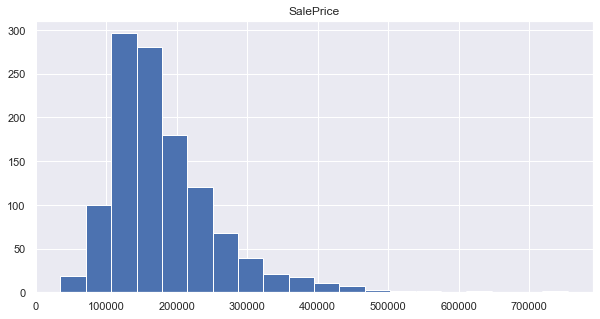

In [9]:
# distribution of y
sns.set(rc={'figure.figsize':(10,5)})
pd.DataFrame(y_train).hist(bins=20)

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

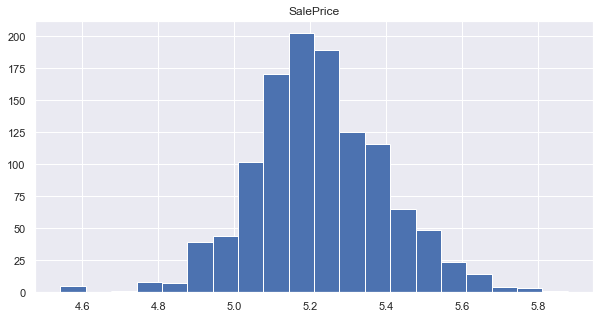

In [10]:
# dist of log trans of y
pd.DataFrame(np.log10(y_train)).hist(bins=20)

In [18]:
num_vars = X_train.columns[[x in ['int64', 'float64'] for x in X_train.dtypes]]
num_df = X_train[num_vars].drop(columns=['Id']).copy()
num_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1074,20,74.0,8556,7,5,2006,2006,0.0,0,0,...,826,140,93,0,0,0,0,0,5,2007
691,60,104.0,21535,10,6,1994,1995,1170.0,1455,0,...,832,382,50,0,0,0,0,0,1,2007
1451,20,78.0,9262,8,5,2008,2009,194.0,0,0,...,840,0,36,0,0,0,0,0,5,2009
883,75,60.0,6204,4,5,1912,1950,0.0,0,0,...,440,0,188,0,0,0,0,0,3,2006
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,20,88.0,13125,5,4,1957,2000,67.0,168,682,...,484,0,0,0,0,0,0,0,1,2006
136,20,NaN,10355,5,5,1967,1967,196.0,695,0,...,318,0,111,0,0,0,0,0,7,2007
865,20,NaN,8750,5,6,1970,1970,76.0,828,0,...,902,0,0,0,0,0,0,0,8,2009
632,20,85.0,11900,7,5,1977,1977,209.0,822,0,...,544,192,0,0,0,0,0,0,4,2009


In [33]:
# check the corr of all num_vars agains y and log(y)
pd.DataFrame({'corr_y':num_df.corrwith(y_train), 'corr_log(y)':num_df.corrwith(np.log(y_train))}).sort_values(by='corr_log(y)', ascending=False)

,corr_y,corr_log(y)
OverallQual,0.796529,0.822225
GrLivArea,0.718886,0.714697
GarageCars,0.649200,0.683597
GarageArea,0.629604,0.651497
TotalBsmtSF,0.620895,0.619976
1stFlrSF,0.610644,0.603176
FullBath,0.562680,0.598575
YearBuilt,0.535776,0.596061
YearRemodAdd,0.517674,0.573772
TotRmsAbvGrd,0.554453,0.553758


### Some features have very high correlation with y, which is good.  And logging y generally makes the correlations more significant. Based on this, I think we should use log(y) as the target.

### Also, most top features are size related.  Consider synthesizing a new feature that aggregates the total size. 